In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import OutputLoader, plot_2d_slice

base_path = "/scratch/gpfs/jp7427/out/double-mach-reflection/"

In [2]:
simMH = OutputLoader(f"{base_path}MUSCL-Hancock")
simZS3 = OutputLoader(f"{base_path}ZS3")
simZS7 = OutputLoader(f"{base_path}ZS7")
simMM3_1 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_1e-5")
simMM7_1 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_1e-5")
simMM3_2 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_1e-3")
simMM7_2 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_1e-3")
simMM3_3 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_5e-3")
simMM7_3 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_5e-3")
simMM3_4 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_1e-2")
simMM7_4 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_1e-2")
simMM3_5 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_5e-2")
simMM7_5 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_5e-2")
simMM3_6 = OutputLoader(f"{base_path}MM3/1rev/no_delta/rtol_1e-1")
simMM7_6 = OutputLoader(f"{base_path}MM7/1rev/no_delta/rtol_1e-1")

sims = [
    simMH,
    simZS3,
    simZS7,
    simMM3_1,
    simMM7_1,
    simMM3_2,
    simMM7_2,
    simMM3_3,
    simMM7_3,
    simMM3_4,
    simMM7_4,
    simMM3_5,
    simMM7_5,
    simMM3_6,
    simMM7_6,
]

idx = simMH.variable_index_map
rho_min = min(sim.snapshots[-1]["w"][idx("rho")].min() for sim in sims)
rho_max = min(sim.snapshots[-1]["w"][idx("rho")].max() for sim in sims)

Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MUSCL-Hancock"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/ZS3"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/ZS7"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM3/1rev/no_delta/rtol_1e-5"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM7/1rev/no_delta/rtol_1e-5"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM3/1rev/no_delta/rtol_1e-3"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM7/1rev/no_delta/rtol_1e-3"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM3/1rev/no_delta/rtol_5e-3"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/double-mach-reflection/MM7/1rev/no_delta/rt

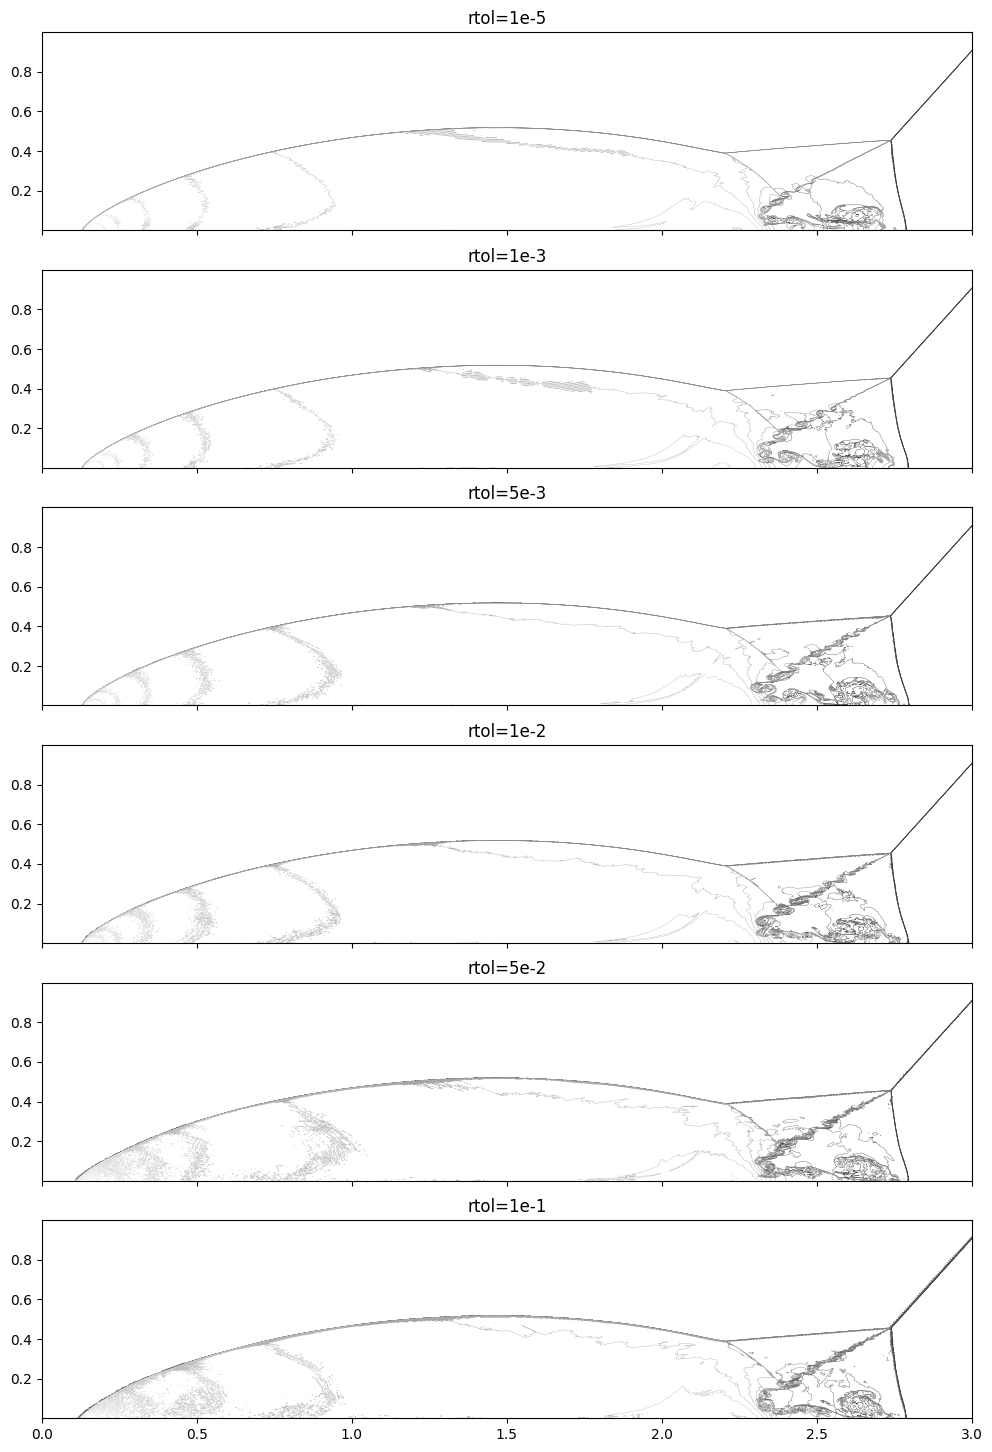

In [5]:
fig, axs = plt.subplots(6, 1, figsize=(12, 18), sharex=True, sharey=True)
axs[0].set_xlim(0, 3)

axs[0].set_title("rtol=1e-5")
axs[1].set_title("rtol=1e-3")
axs[2].set_title("rtol=5e-3")
axs[3].set_title("rtol=1e-2")
axs[4].set_title("rtol=5e-2")
axs[5].set_title("rtol=1e-1")

for i, sim in enumerate([simMM7_1, simMM7_2, simMM7_3, simMM7_4, simMM7_5, simMM7_6]):
    # plot_2d_slice(
    #     sim, axs[i], "rho", cmap="viridis", colorbar=False, vmin=rho_min, vmax=rho_max,
    # )
    plot_2d_slice(
        sim,
        axs[i],
        "rho",
        cmap="grey",
        colorbar=False,
        vmin=rho_min,
        vmax=rho_max,
        levels=np.linspace(rho_min, rho_max, 21),
        linewidths=0.25,
    )

fig.savefig("aposteriori.pdf", bbox_inches="tight")

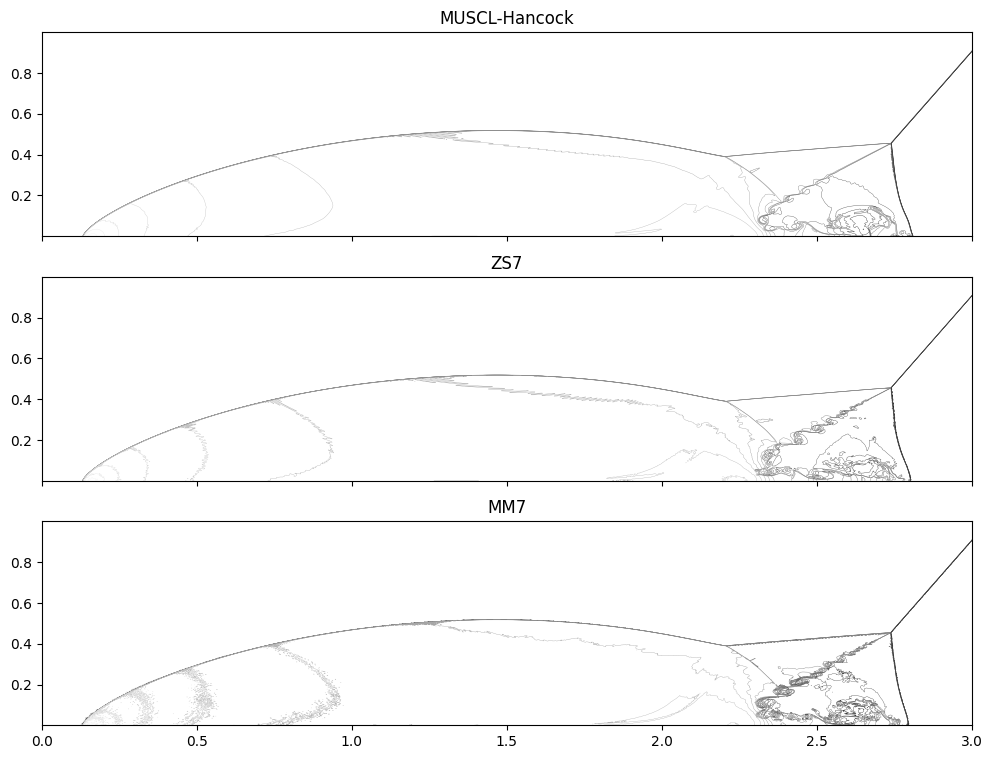

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(12, 9), sharex=True, sharey=True)
axs[0].set_xlim(0, 3)

axs[0].set_title("MUSCL-Hancock")
axs[1].set_title("ZS7")
axs[2].set_title("MM7")

for i, sim in enumerate([simMH, simZS7, simMM7_4]):
    # plot_2d_slice(
    #     sim, axs[i], "rho", cmap="viridis", colorbar=False, vmin=rho_min, vmax=rho_max,
    # )
    plot_2d_slice(
        sim,
        axs[i],
        "rho",
        cmap="grey",
        colorbar=False,
        vmin=rho_min,
        vmax=rho_max,
        levels=np.linspace(rho_min, rho_max, 21),
        linewidths=0.25,
    )

fig.savefig("compare.pdf", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
ax.set_xlim(0, 3)

sim = simMM7_6
name = "MM7-rtol_1e-1"
ax.set_title(name)

# plot_2d_slice(
#     sim, axs[i], "rho", cmap="viridis", colorbar=False, vmin=rho_min, vmax=rho_max,
# )
plot_2d_slice(
    sim,
    ax,
    "rho",
    cmap="grey",
    colorbar=False,
    vmin=rho_min,
    vmax=rho_max,
    levels=np.linspace(rho_min, rho_max, 21),
    linewidths=0.25,
)

fig.savefig(f"{name}.pdf", bbox_inches="tight")